<a href="https://colab.research.google.com/github/hizieun/ToTheTransformer/blob/main/_03_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

## STEP 1. 데이터 모으기

In [ ]:
# case 1
N=20
random0=torch.randn(int(N/2),1)
random5=torch.randn(int(N/2),1)+5
class1_data=torch.hstack([random0,random5])
class2_data=torch.hstack([random5,random0])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data]) # 좌표값을 모아놓은 데이터
y=torch.vstack([class1_label,class2_label])

# case 2 (주석처리해서 보기)
N=100
radius1=0.3+0.05*torch.randn(int(N/2),1)
radius2=1+0.01*torch.randn(int(N/2),1)
theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
class1_data=torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
class2_data=torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

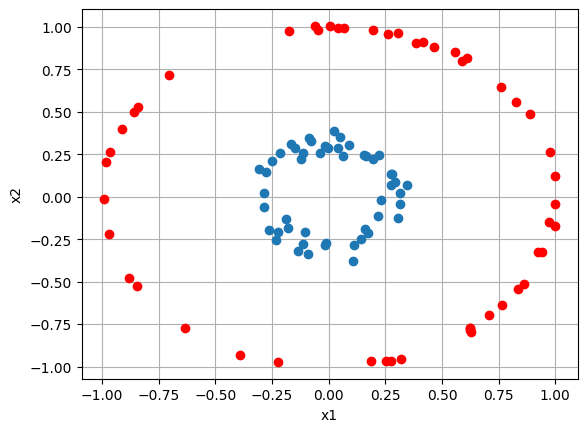

In [ ]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0],class1_data[:,1],'o')
plt.plot(class2_data[:,0],class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [ ]:
X # 20X2

tensor([[ 0.1096, -0.2837],
        [-0.2307, -0.2532],
        [-0.1113, -0.2771],
        [ 0.3469,  0.0670],
        [ 0.0486,  0.3516],
        [ 0.1632,  0.2370],
        [ 0.0407,  0.2849],
        [ 0.3154,  0.0200],
        [-0.0389,  0.2557],
        [ 0.1554,  0.2437],
        [-0.0183,  0.2996],
        [-0.0896, -0.3366],
        [ 0.1720, -0.2114],
        [ 0.2219,  0.2451],
        [-0.2135,  0.2567],
        [ 0.1073, -0.3798],
        [ 0.2294, -0.0189],
        [ 0.0619,  0.2418],
        [-0.1243,  0.2196],
        [-0.2859,  0.0230],
        [-0.3096,  0.1613],
        [-0.2494,  0.2076],
        [-0.1479,  0.2879],
        [-0.1679,  0.3088],
        [-0.1129,  0.2599],
        [-0.1034, -0.2094],
        [ 0.2162, -0.1164],
        [ 0.2802,  0.1313],
        [-0.1900, -0.1329],
        [ 0.0233,  0.3872],
        [-0.1795, -0.1859],
        [ 0.1588, -0.1915],
        [-0.2241, -0.2092],
        [ 0.2746,  0.0668],
        [-0.0167, -0.2830],
        [ 0.0881,  0

## STEP 2. 모델 만들기

In [ ]:
# 좌표값(x1,x2) 이므로 데이터 개수와 상관 없이, 입력노드는 2개여야함
# 이진분류이므로 출력노드는 1개
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case 1, plain
        # self.linear = nn.Sequential(nn.Linear(2, 10000), # 10,100,1000,10000 으로 바꿔보면서서 확인
        #                             nn.Sigmoid(),
        #                             nn.Linear(10000, 1), # node가 많을수록 좋게 나옴
        #                             nn.Sigmoid()) # output layer
        # case 1, very simple
        # self.linear = nn.Sequential(nn.Linear(2, 1), # 아주 simple 한 것도 오히려 갠춘
        #                             nn.Sigmoid())
        # # case 1, deep
        # self.linear = nn.Sequential(nn.Linear(2, 100), # deep 하면 오래 걸림 (adam으로 바꾸면 해결 (작은 gradient면 분모가 작아져서 쭉쭉 나아감)) vanishing gradient랑 좀 다른 문제인 것 같다
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())

        # # case 2, plain
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())
        # # case 2, very simple
        # self.linear = nn.Sequential(nn.Linear(2, 1), # 선형 분류만 가능해서 불가
        #                             nn.Sigmoid())
        # # case 2, deep
        # self.linear = nn.Sequential(nn.Linear(2, 100), # LR을 줄이니까 수렴
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())
        # # case 2, very deep (sigmoid 때문에 vanishing gradient 문제 발생하여 학습이 제대로 되지 않음!)
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.Sigmoid(),
        #                             *[i for _ in range(10) for i in [nn.Linear(100, 100), nn.Sigmoid()]],
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())
        # # case 2, very deep relu
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.ReLU(),
                                    *[i for _ in range(10) for i in [nn.Linear(100, 100), nn.ReLU()]],
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())

    def forward(self, x):
        x = self.linear(x)
        return x

In [ ]:
# nn.Sequential(*[nn.Sequential(nn.Linear(100,100), nn.Sigmoid()) for _ in range(10)])
# nn.Sequential(*[nn.Linear(100,100) if i % 2 == 0 else nn.Sigmoid() for i in range(20)])
nn.Sequential(*[i for _ in range(10) for i in [nn.Linear(100,100), nn.Sigmoid()]]) # Unzip Operator
# 아래와 같은 이중포문임
# model = []
# for _ in range(10):
#   for i in [nn.Linear(100,100), nn.Sigmoid()]:
#     model.append(i)
# model

Sequential(
  (0): Linear(in_features=100, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): Sigmoid()
  (8): Linear(in_features=100, out_features=100, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=100, out_features=100, bias=True)
  (11): Sigmoid()
  (12): Linear(in_features=100, out_features=100, bias=True)
  (13): Sigmoid()
  (14): Linear(in_features=100, out_features=100, bias=True)
  (15): Sigmoid()
  (16): Linear(in_features=100, out_features=100, bias=True)
  (17): Sigmoid()
  (18): Linear(in_features=100, out_features=100, bias=True)
  (19): Sigmoid()
)

In [ ]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape) # 2개 값으로 이루어진 좌표값 (x1,x2) 데이터 5개를 입력함

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): ReLU()
    (10): Linear(in_features=100, out_features=100, bias=True)
    (11): ReLU()
    (12): Linear(in_features=100, out_features=100, bias=True)
    (13): ReLU()
    (14): Linear(in_features=100, out_features=100, bias=True)
    (15): ReLU()
    (16): Linear(in_features=100, out_features=100, bias=True)
    (17): ReLU()
    (18): Linear(in_features=100, out_features=100, bias=True)
    (19): ReLU()
    (20): Linear(in_features=100, out_features=100, bias=True)
    (21): ReLU()
    (22): Linear(in_features=100, out_features=1, bias=True)
    (23): Sigmoid()
  )
)
torch.Size([5, 1

## STEP 3. 모델 학습시키기

중요!!

In [ ]:
from torch import optim
import torch.nn.functional as F

# LR = 1e-1 # case 1
# LR = 1e-2 # case 2, plain 에서 노드 천 개, deep
LR = 1e-4 # case 2, very deep relu
# EPOCH = 100 # case 1
EPOCH = 500 # case 2, plain 에서 노드 천 개, deep, very deep relu

# optimizer = optim.SGD(model.parameters(), lr=LR)
optimizer = optim.Adam(model.parameters(), lr=LR) # case 1, deep

loss_history=[]


model.train() # train mode로 전환 (써주는게 좋다!)
########## 아래 학습코드 중요 ################
########## GD를 구하는 경우 ################
for ep in range(EPOCH):
    # inference
    y_hat = model(X)
    #### 확인 시작 ========
    # print(X.shape)
    # print(y_hat.shape)
    # print(y)
    # break
    #### 확인 끝 ========
    # loss
    loss = F.binary_cross_entropy(y_hat, y) # nn 모듈에도 있음
    # update
    optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
    loss.backward() # backpropagation(모든 웨이트에 대한 미분)
    optimizer.step() # weight update
    #### weight = weight - LR*weight.grad # 원래 이렇게 구현해야하지만,파이토치에서는 파라미터만 넘겨주면 알아서 optim.SGD에서 계산해줌
    # print loss
    loss_history += [loss.item()]
    print(f"Epoch: {ep+1}, train loss: {round(loss.item(),4)}")
    print("-"*20)

Epoch: 1, train loss: 0.6932
--------------------
Epoch: 2, train loss: 0.6932
--------------------
Epoch: 3, train loss: 0.6932
--------------------
Epoch: 4, train loss: 0.6931
--------------------
Epoch: 5, train loss: 0.6931
--------------------
Epoch: 6, train loss: 0.6931
--------------------
Epoch: 7, train loss: 0.6931
--------------------
Epoch: 8, train loss: 0.6931
--------------------
Epoch: 9, train loss: 0.6931
--------------------
Epoch: 10, train loss: 0.6931
--------------------
Epoch: 11, train loss: 0.6931
--------------------
Epoch: 12, train loss: 0.6931
--------------------
Epoch: 13, train loss: 0.6931
--------------------
Epoch: 14, train loss: 0.6931
--------------------
Epoch: 15, train loss: 0.6931
--------------------
Epoch: 16, train loss: 0.6931
--------------------
Epoch: 17, train loss: 0.6931
--------------------
Epoch: 18, train loss: 0.6931
--------------------
Epoch: 19, train loss: 0.6931
--------------------
Epoch: 20, train loss: 0.6931
----------

In [ ]:
x= torch.tensor([1.],requires_grad=True)
for _ in range(2):
    loss=x**2
    loss.backward()
    print(x.grad)
    # x.grad = None ## 이게 없다면, 기존 값에 +2가 누적돼버려서 -> optimizer.zero_grad()를 통해 초기화 해준다.

tensor([2.])
tensor([4.])


In [ ]:
x= torch.tensor([1.],requires_grad=True)
x.item() # 값만 뽑아서 보여줌

1.0

In [ ]:
print(F.binary_cross_entropy(y_hat,y))
print(torch.sum(-torch.log( y_hat**y  *  (1-y_hat)**(1-y))) /N ) # BinaryCrossEntropy 수식인데, 위에 함수로 대신 사용하면 됨
print(F.binary_cross_entropy(torch.tensor([0.]),torch.tensor([1.]))) # 100 이 최대다..!(f.binnary cross entropy) BCELoss

tensor(3.5434e-06, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(3.5435e-06, grad_fn=<DivBackward0>)
tensor(100.)


Text(0, 0.5, 'Loss')

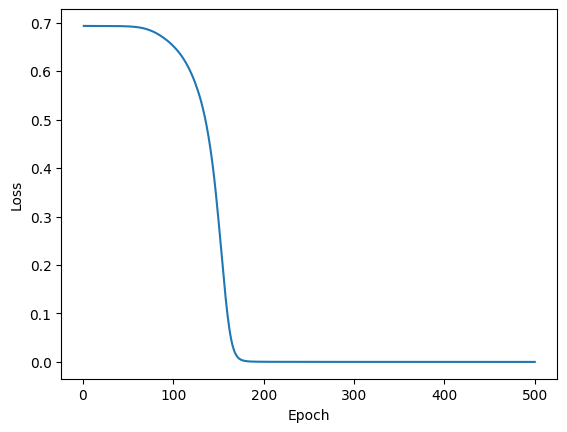

In [ ]:
plt.plot(range(1,EPOCH+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")

## STEP 4. 모델 테스트하기

Text(0.5, 0.5, 'x2')

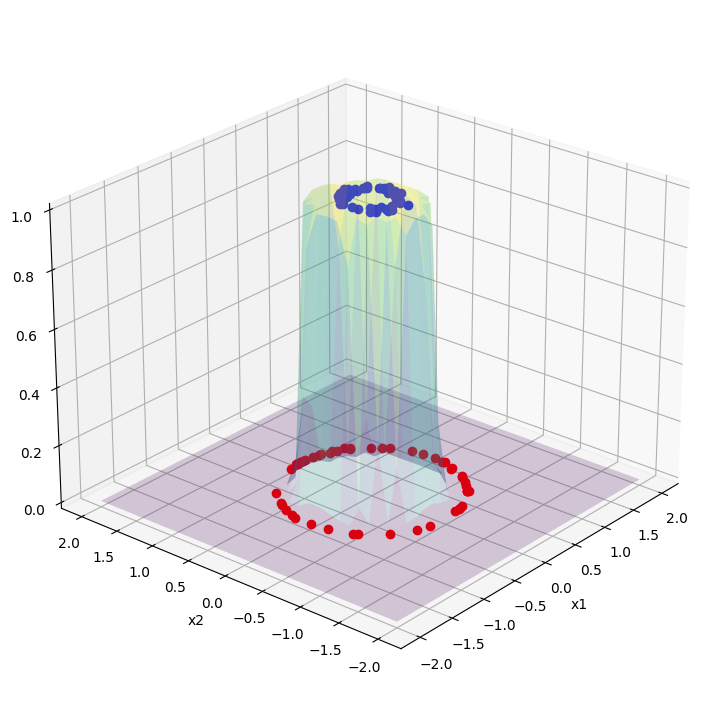

In [ ]:
# x1_test=torch.linspace(-10,10,30) # case 1
# x2_test=torch.linspace(-10,10,30) # case 1
x1_test=torch.linspace(-2,2,30) # case 2
x2_test=torch.linspace(-2,2,30) # case 2
X1_test, X2_test=torch.meshgrid(x1_test,x2_test) # 값을 모두 통과시킴
X_test=torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)

model.eval() # test mode로 # 1. 해결
with torch.no_grad(): # 2. 해결
    y_hat=model(X_test)
# 1. dropout 혹은 BN 같은거 사용했다면 train mode와 test mode 동작이 다르므로 eval()로 mode를 바꿔줘야함!
# 2. grad_fn 계산 <- 메모리가 불필요하게 쓰인다(moving average를 구하는데)
Y_hat = y_hat.squeeze()

# print(model.training)
# model.train()
# print(model.training)

plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test,X2_test,Y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X1_test, y=X2_test, z=Y_hat, colorscale="viridis", opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='binary classification', width=700, height=600)